In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, roc_curve
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import SVC

from scipy.cluster.hierarchy import ward, dendrogram, fcluster

In [29]:
%run ../scripts/post_scraping_text_processing.py functions

Text processing functions loaded.


In [3]:
df = pd.read_csv('../assets/data/full_frame_20180711.csv', index_col = 0)

In [4]:
corpus = df['lemmatized_text'].copy()

In [6]:
cvec = CountVectorizer(stop_words=STOP_WORDS, max_features = 10000 )

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized_text'], df['written_before_2004'])

In [8]:
cvec.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={'siz', 'böylecene', 'önce', 'zaten', 'çok', 'nedenler', 'edecek', 'olarak', 'burada', 'kaynak', 'şayet', 'bunda', 'dahi', 'üzere', 'olursa', 'birilerinin', 'ya', 'şimdi', 'beri', 'ilgili', 'ayrıca', 'herkesten', 'deminden', 'peyderpey', 'itibarıyla', 'birisinden', 'öncelikle', 'hasebiyle..., 'iken', 'bunlar', 'hiçbir', 'tam', 'çoklarınca', 'birice', 'gayetle', 'demin', 'hoş', 'kendisini'},
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
X_train_trans = cvec.transform(X_train)
X_test_trans = cvec.transform(X_test)

In [10]:
lr = LogisticRegression()

In [11]:
lr.fit(X_train_trans, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
lr.score(X_test_trans, y_test)

0.64309851832596832

In [64]:
df = pd.read_csv('/Users/jswithers/Downloads/merged_rawPredictions.csv')

In [65]:
df.head()

,"{""added"":[""part-00000-tid-8086206716274430561-5d947a8e-6803-4ee8-a0ac-72f329fa7141-2406-c000.csv""",part-00001-tid-8086206716274430561-5d947a8e-6803-4ee8-a0ac-72f329fa7141-2407-c000.csv,part-00002-tid-8086206716274430561-5d947a8e-6803-4ee8-a0ac-72f329fa7141-2408-c000.csv,part-00003-tid-8086206716274430561-5d947a8e-6803-4ee8-a0ac-72f329fa7141-2409-c000.csv],removed:[]}286,0.0,0,0.8553257800650063,-0.8553257800650063
0,289,0.0,0,0.423098,-0.423098,NaN,NaN,NaN,NaN
1,292,0.0,0,0.498143,-0.498143,NaN,NaN,NaN,NaN
2,436,0.0,0,0.950636,-0.950636,NaN,NaN,NaN,NaN
3,442,0.0,0,0.582689,-0.582689,NaN,NaN,NaN,NaN
4,475,0.0,0,1.057223,-1.057223,NaN,NaN,NaN,NaN


In [66]:
df.columns = ['index', 'y_true', 'y_hat', 'prob_0', 'prob_1', 'x','c','v','b']

In [67]:
df.head()

,index,y_true,y_hat,prob_0,prob_1,x,c,v,b
0,289,0.0,0,0.423098,-0.423098,NaN,NaN,NaN,NaN
1,292,0.0,0,0.498143,-0.498143,NaN,NaN,NaN,NaN
2,436,0.0,0,0.950636,-0.950636,NaN,NaN,NaN,NaN
3,442,0.0,0,0.582689,-0.582689,NaN,NaN,NaN,NaN
4,475,0.0,0,1.057223,-1.057223,NaN,NaN,NaN,NaN


In [68]:
df = df[['index', 'y_true', 'y_hat', 'prob_0', 'prob_1']]

In [69]:
df.index = df['index'].values

In [70]:
df.drop('index', axis = 1, inplace = True)

In [71]:
df.columns = df.columns.get_level_values(0)

In [72]:
df.head(20)

,y_true,y_hat,prob_0,prob_1
289,0.0,0,0.423098,-0.423098
292,0.0,0,0.498143,-0.498143
436,0.0,0,0.950636,-0.950636
442,0.0,0,0.582689,-0.582689
475,0.0,0,1.057223,-1.057223
545,0.0,0,0.574421,-0.574421
730,0.0,0,0.873808,-0.873808
739,0.0,0,1.418174,-1.418174
852,0.0,0,1.085413,-1.085413
860,0.0,0,0.931246,-0.931246


In [78]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

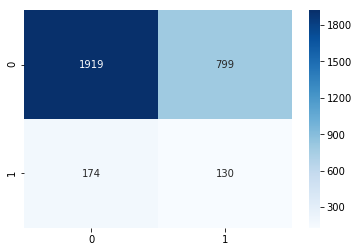

In [77]:
sns.heatmap(confusion_matrix(df['y_true'], df['y_hat']), fmt = 'g', annot = True, cmap = 'Blues')

In [90]:
fpr, tpr, _ = roc_curve(df['y_true'], df['prob_1'])

In [117]:
df['prob_0'].max(),df['prob_0'].min() 

(5.4333739774810281, -8.8878855230919012)

In [93]:
df['prob_1'].max(),df['prob_1'].min() 

(8.8878855230919012, -5.4333739774810281)

In [94]:
mn = df['prob_1'].min() 
mx = df['prob_1'].max()

In [95]:
df['proba'] = (df['prob_1'] - mn)/(mx - mn)

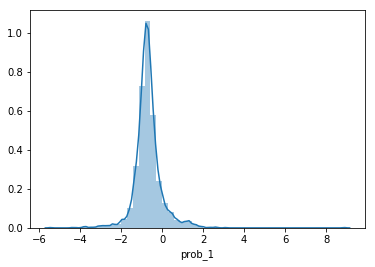

In [158]:
sns.distplot(df['prob_1'])

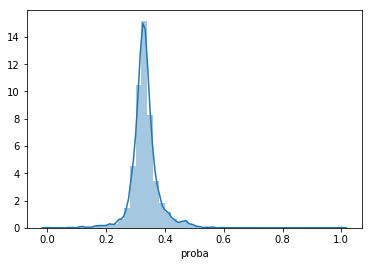

In [98]:
sns.distplot(df['proba'])

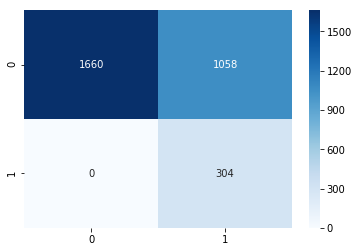

In [129]:
df['y_hat2'] = df['prob_1'].map(lambda x: 0 if x < df['prob_1'].mean() else 1)

sns.heatmap(confusion_matrix(df['y_true'], df['y_hat2']), fmt = 'g', annot = True, cmap = 'Blues')

In [151]:
df['prob_1'].mean()+.68

0.00042079535302153026

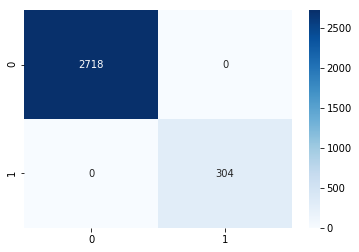

In [150]:
df['y_hat2'] = df['prob_1'].map(lambda x: 0 if x < df['prob_1'].mean()+.68
                                            else 1)

sns.heatmap(confusion_matrix(df['y_true'], df['y_hat2']), fmt = 'g', annot = True, cmap = 'Blues')

In [131]:
fpr, tpr, _ = roc_curve(df['y_true'], df['prob_1'])

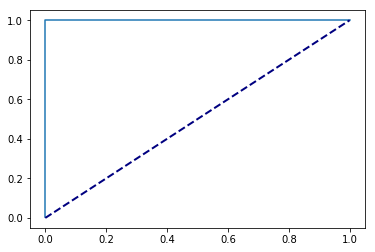

In [132]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

In [133]:
auc(fpr, tpr)

1.0